In [1]:
pip install tensorflow matplotlib numpy


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # CIFAR-10 has 10 classes
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.3464 - loss: 1.7567 - val_accuracy: 0.5537 - val_loss: 1.2425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 51ms/step - accuracy: 0.5806 - loss: 1.1781 - val_accuracy: 0.6281 - val_loss: 1.0610
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.6530 - loss: 0.9945 - val_accuracy: 0.6673 - val_loss: 0.9617
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6913 - loss: 0.8776 - val_accuracy: 0.6836 - val_loss: 0.9101
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7148 - loss: 0.8114 - val_accuracy: 0.6876 - val_loss: 0.9096
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.7385 - loss: 0.7474 - val_accuracy: 0.6969 - val_loss: 0.8746
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.7547 - loss: 0.6918 - val_accuracy: 0.7013 - val_loss: 0.8823
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 48ms/step - accuracy: 0.7754 

In [3]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 4s - 14ms/step - accuracy: 0.7159 - loss: 0.8678

Test accuracy: 0.7159000039100647


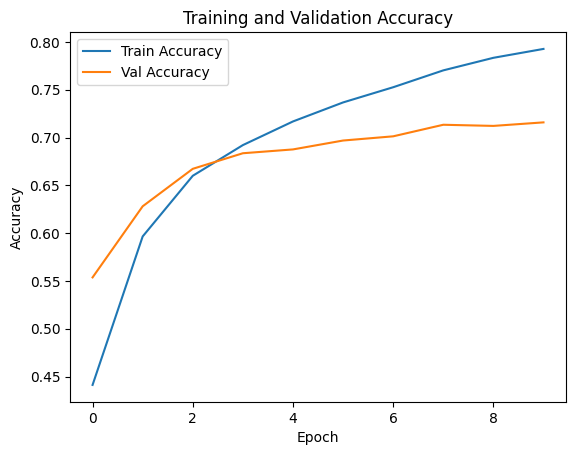

In [4]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = tf.argmax(model.predict(x_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
[[779  25  25  25  25  14   9  11  62  25]
 [ 26 854   4  15   4   5  18   5  13  56]
 [ 77   6 495  84 101 108  75  36  12   6]
 [ 18   6  34 596  59 177  57  36  11   6]
 [ 11   3  42  90 682  39  65  53  10   5]
 [ 16   1  18 198  37 641  25  54   5   5]
 [  2   5  25  77  33  27 818   7   4   2]
 [  9   2  16  53  62  60   6 780   3   9]
 [ 96  34  11  26  12  12   9   6 775  19]
 [ 46 102   7  26   7  16  12  15  30 739]]
              precision    recall  f1-score   support

    airplane       0.72      0.78      0.75      1000
  automobile       0.82      0.85      0.84      1000
        bird       0.73      0.49      0.59      1000
         cat       0.50      0.60      0.54      1000
        deer       0.67      0.68      0.67      1000
         dog       0.58      0.64      0.61      1000
        frog       0.75      0.82      0.78      1000
       horse       0.78      0.78      0.78      1000
        ship       0.84      0.78      

In [6]:
model.save("cnn_image_classifier.h5")
